In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [12]:
X = df.drop('Exited',axis=1)
y = df['Exited']            

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)   

In [16]:
X_train.shape

(8000, 11)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=(X_train.shape[1])))
model.add(Dense(1,activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
X_train.shape[1]

11

In [20]:
model1 = Sequential()

model1.add(Dense(11,activation='relu',input_dim=(X_train.shape[1])))
model1.add(Dense(11,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step - accuracy: 0.7728 - loss: 0.6033
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.7945 - loss: 0.5276
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7945 - loss: 0.4919
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.7945 - loss: 0.4713
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.7945 - loss: 0.4576
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.7945 - loss: 0.4478
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7955 - loss: 0.4405
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8014 - loss: 0.4350
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.8092 - loss: 0.4310
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8114 - loss: 0.4278
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.8120 - loss: 0.4250
Epoch 12/50
250/250 ━━━━━━━━━━

In [24]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model1.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7298 - loss: 0.5608 - val_accuracy: 0.7987 - val_loss: 0.4689
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.7934 - loss: 0.4601 - val_accuracy: 0.7994 - val_loss: 0.4426
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.7942 - loss: 0.4440 - val_accuracy: 0.7987 - val_loss: 0.4317
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.7986 - loss: 0.4336 - val_accuracy: 0.8025 - val_loss: 0.4252
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8075 - loss: 0.4259 - val_accuracy: 0.8106 - val_loss: 0.4194
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8150 - loss: 0.4186 - val_accuracy: 0.8194 - val_loss: 0.4138
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8216 - loss: 0.4123 - val_accuracy: 0.8231 - val_loss: 0.4089
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.8263 - loss: 0.4059 - va

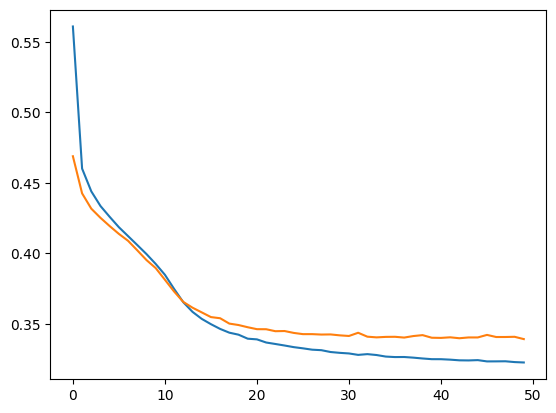

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])

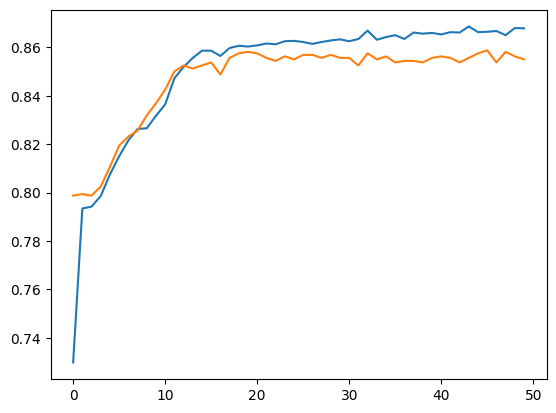

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1.layers[0].get_weights()
model1.layers[1].get_weights()
model1.layers[2].get_weights()

[array([[-1.3756698 ],
        [-0.8988882 ],
        [ 1.0179111 ],
        [-0.3132668 ],
        [ 1.0910382 ],
        [-0.04151876],
        [-0.2138195 ],
        [-0.5523782 ],
        [ 0.8325502 ],
        [ 0.8632127 ],
        [ 0.42119032]], dtype=float32),
 array([0.02100058], dtype=float32)]

In [28]:
model.layers[0].get_weights()

[array([[-1.88787550e-01,  1.35486005e-02, -4.59404197e-03],
        [ 3.55641437e+00, -2.94286281e-01,  3.69511575e-01],
        [-9.77806654e-03,  9.32894722e-02,  1.03039011e-01],
        [ 2.75384426e-01, -8.17188621e-01,  1.21833348e+00],
        [ 5.80786884e-01, -1.04713237e+00,  3.47028780e+00],
        [ 9.52879637e-02,  7.13618323e-02, -4.42286506e-02],
        [ 5.51849544e-01,  1.34966314e+00,  5.56407630e-01],
        [-1.42649457e-01, -3.25485715e-03, -1.14616551e-01],
        [ 2.20112130e-02, -2.82126188e-01, -9.70526397e-01],
        [-3.65642607e-02, -2.74107784e-01,  1.81922555e-01],
        [-1.10974051e-01,  5.40274382e-01,  5.70262149e-02]], dtype=float32),
 array([-0.49048826,  1.0949601 ,  1.8275971 ], dtype=float32)]

In [29]:
model.layers[1].get_weights()


[array([[ 2.496388 ],
        [-2.1458309],
        [-2.304837 ]], dtype=float32),
 array([0.15099354], dtype=float32)]

In [30]:
model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step


array([[0.08841251],
       [0.10559433],
       [0.32806757],
       ...,
       [0.53291225],
       [0.1254434 ],
       [0.25768188]], shape=(2000, 1), dtype=float32)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


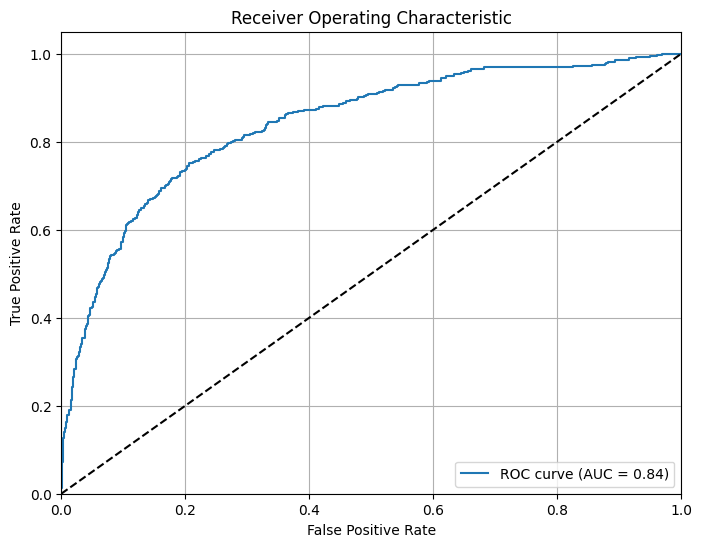

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities (only the positive class)
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# Compute ROC curve and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [32]:
# Apply the best threshold to get binary predictions
y_pred = np.where(y_pred_prob > 0.5,1,0) 

In [33]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy at Best Threshold:", accuracy)

Accuracy at Best Threshold: 0.843
